In [48]:
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
pip install tensorflow==2.17.0

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [52]:
# Memuat model jerawat dan model jenis kulit
acne_model = load_model("/content/drive/MyDrive/BEAUSKIN ML/model/acne_detection.h5")
skin_type_model = load_model("/content/drive/MyDrive/BEAUSKIN ML/model/skintypes_detection_model.h5")
chatbot_model = load_model("/content/drive/MyDrive/BEAUSKIN ML/model/chatbot_model.h5")

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prediksi Acne: Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediksi Jenis Kulit: oily


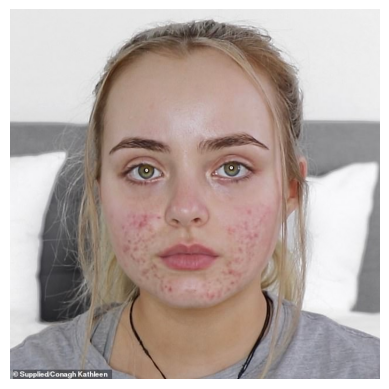

Rekomendasi Produk:


,Product Name,Product Type,Brand,Description,Main Effects,Price
0,ACWELL Bubble Free PH Balancing Cleanser,Face Wash,ACWELL,Mengangkat kotoran dan menghapus makeup dalam ...,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Rp209.000
3,ACWELL Aquaseal Soothing Tonic,Toner,ACWELL,Pre-essence yang diformulasikan dengan ekstrak...,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Rp290.000
29,ARGAVELL 100% Organic Argan Oil,Moisturizer,ARGAVELL,Diekstrak secara alami dari biji buah Argan da...,"Acne-Free, Oil-Control, Anti-Aging",Rp130.000
36,AVOSKIN Miraculous Refining Serum Anniversary ...,Serum,AVOSKIN,Avoskin Miraculous Refining Serum berfungsi se...,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Rp239.000
38,AVOSKIN Miraculous Refining Toner 100ml,Toner,AVOSKIN,Dikombinasikan dari AHA-BHA-PHA+ Niacinamide +...,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Rp189.000


In [99]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Fungsi preprocess untuk mempersiapkan gambar (dengan ukuran target yang sama)
def preprocess_image(image_path, target_size=(128, 128)):
    image = Image.open(image_path)
    image = image.resize(target_size)
    image_array = np.array(image) / 255.0  # Normalisasi gambar
    image_array = np.expand_dims(image_array, axis=0)  # Menambahkan batch dimension
    return image_array

# Fungsi untuk mendapatkan nama label berdasarkan hasil prediksi (Acne)
def get_acne_label_name(prediction):
    predicted_class = "Acne" if prediction[0][0] > 0.5 else "No Acne"
    return predicted_class

# Fungsi untuk mendapatkan nama label berdasarkan hasil one-hot encoding (Jenis Kulit)
def get_skin_type_label_name(label):
    skin_type_labels = {0: 'dry', 1: 'normal', 2: 'oily'}
    return skin_type_labels.get(label, "Unknown")

# Fungsi untuk memberikan rekomendasi produk berdasarkan jenis kulit dan kondisi jerawat
def recommend_products(skin_type, acne_condition, skincare_data):
    # Pastikan skin_type dan acne_condition adalah string
    skin_type = str(skin_type).lower()  # Convert to lowercase for case-insensitive comparison
    acne_condition = str(acne_condition).lower()

    # Mapping jenis kulit ke kolom one-hot encoding yang sesuai
    skin_type_column = skin_type.capitalize()  # 'Oily', 'Dry', or 'Normal' for the corresponding column name

    # Filter produk berdasarkan jenis kulit (one-hot encoding) dan kondisi jerawat
    recommended_products = skincare_data[
        (skincare_data[skin_type_column] == 1) &  # Filter produk dengan skin_type yang sesuai
        (skincare_data['notable_effects'].str.contains(acne_condition, case=False, na=False))
    ]

    # Mengecek apakah ada produk yang cocok
    if recommended_products.empty:
            return "No products match your skin condition."
    else:
            # Rename columns to more readable format
            recommended_products_renamed = recommended_products[['product_name', 'product_type', 'brand', 'description', 'notable_effects', 'price']].head(5)
            recommended_products_renamed = recommended_products_renamed.rename(columns={
                'product_name': 'Product Name',
                'product_type': 'Product Type',
                'brand': 'Brand',
                'notable_effects': 'Main Effects',
                'price': 'Price',
                'description': 'Description'
            })
            return recommended_products_renamed

# Fungsi untuk menampilkan gambar
def show_image(image_path):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Memuat dataset skincare
skincare = pd.read_csv('/content/drive/MyDrive/BEAUSKIN ML/skincare dataset/export_skincare.csv')

# Path ke gambar yang ingin dianalisis
image_path = '/content/drive/MyDrive/BEAUSKIN ML/ACNE_DETECTION/train/Acne/10.jpg'
preprocessed_image = preprocess_image(image_path, target_size=(128, 128))

# Prediksi dengan model acne
acne_prediction = acne_model.predict(preprocessed_image)
acne_condition = get_acne_label_name(acne_prediction)
print("Prediksi Acne:", acne_condition)

# Prediksi dengan model skin type
skin_type_prediction = skin_type_model.predict(preprocessed_image)
skin_type_label = np.argmax(skin_type_prediction, axis=1)[0]
skin_type_name = get_skin_type_label_name(skin_type_label)
print("Prediksi Jenis Kulit:", skin_type_name)

# Menampilkan gambar
show_image(image_path)

# Menampilkan rekomendasi produk berdasarkan hasil deteksi
recommended_products = recommend_products(skin_type_name, acne_condition, skincare)
print("Rekomendasi Produk:")
recommended_products
